# Analyse multivariée quantitative : PCA, K-means, CAH, DBSCAN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data=pd.read_csv("Test_Clusters_Distincts.txt", sep=" ", decimal=".")
data

,Var1;Var2;Var3;Var4;Var5;Var6
0,0.11221283652474;0.614523245990536;-0.12055387...
1,-0.404109798709794;-0.0421210291108647;0.57459...
2,-0.0181898829080891;0.263354966628446;0.429379...
3,1.69384701152304;1.38255200058003;0.8342881745...
4,0.721388544980651;-0.407651885426458;0.5738846...
...,...
1495,-5.36447365816256;-7.48098940020918;-4.2904409...
1496,-5.0968738957896;-5.24732247141865;-2.80565984...
1497,-4.87504346242483;-5.19167484729724;-4.1152504...
1498,-4.63083452123554;-4.13786306218912;-5.0535037...


## 1) Nuage de points des variables 2 à 2

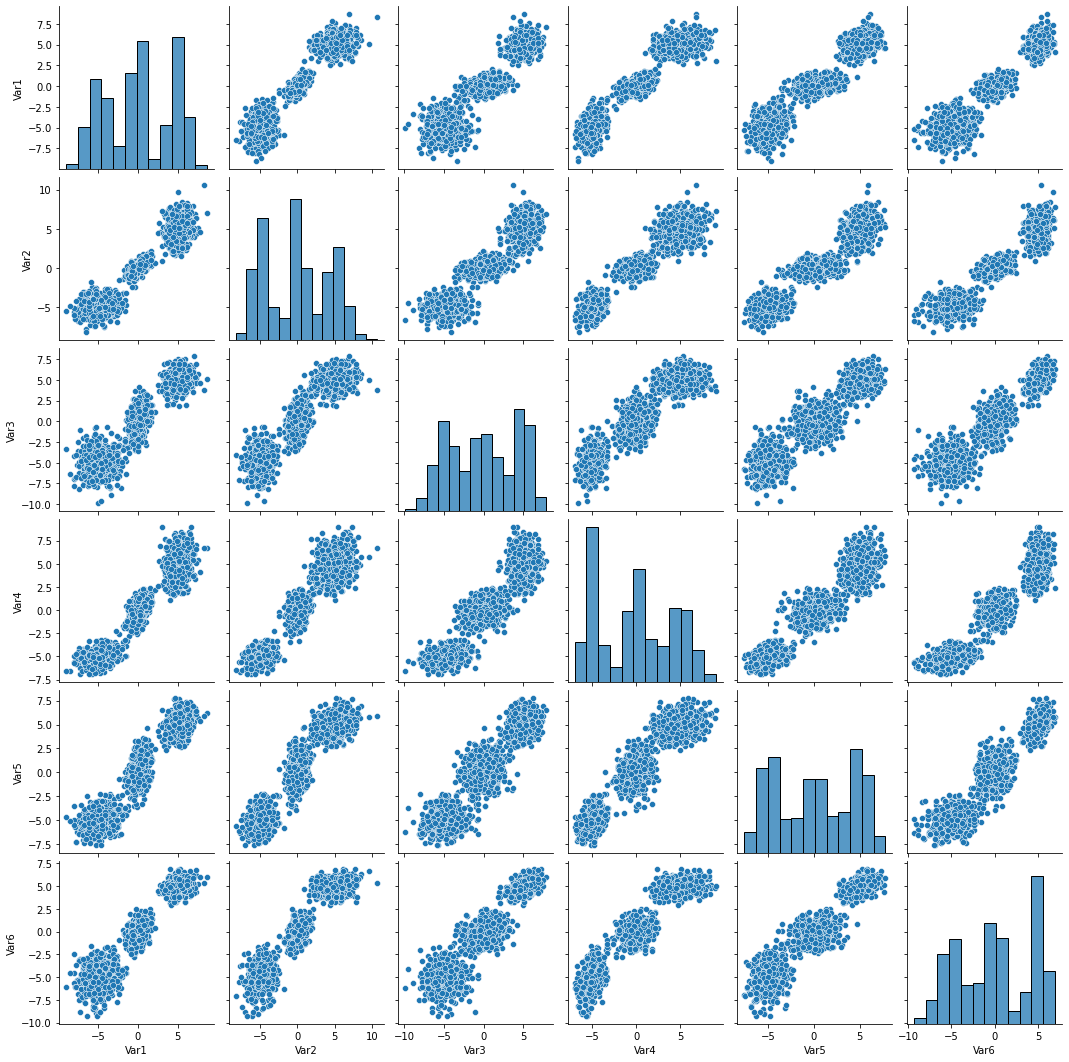

In [3]:
plot=sb.pairplot(data)

## 2) PCA (manque représentation cercle de corrélation et nuage de points sur les nouvelles composantes)

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [5]:
#Centrer et réduire, méthode 1 :
data_cr = data.sub(data.mean()) #centrer
data_cr = data_cr.div(data_cr.std()) #réduire
print(data_cr)
# Méthode 2:
scaler = StandardScaler()
scaler.fit(data) 
data_cr2=scaler.transform(data)
print(data_cr2)

          Var1      Var2      Var3      Var4      Var5      Var6
0     0.013569  0.136628 -0.031182 -0.014232  0.185250  0.092842
1    -0.108899 -0.018749  0.131949 -0.044770  0.070683  0.334036
2    -0.017362  0.053534  0.097872  0.183508  0.056884  0.109997
3     0.388721  0.318362  0.192892  0.299827  0.373584  0.267021
4     0.158061 -0.105242  0.131783  0.051816  0.161049  0.525760
...        ...       ...       ...       ...       ...       ...
1495 -1.285460 -1.778956 -1.009733 -1.329921 -1.192799 -1.180117
1496 -1.221987 -1.250419 -0.661298 -1.234775 -1.578398 -1.305513
1497 -1.169371 -1.237251 -0.968621 -1.212505 -1.182846 -1.024417
1498 -1.111446 -0.987895 -1.188801 -1.014534 -1.159578 -0.551850
1499 -1.351355 -1.460925 -1.434151 -1.203737 -1.260037 -1.302048

[1500 rows x 6 columns]
[[ 0.01357345  0.13667393 -0.03119209 -0.01423681  0.18531197  0.09287278]
 [-0.10893523 -0.01875499  0.13199262 -0.04478512  0.07070648  0.33414732]
 [-0.01736741  0.05355175  0.09790437  0.1835

In [6]:
#PCA
pca=PCA(n_components=6) #nombre de variable qu'on a dans le dataset centré réduit
pca.fit(data_cr)

#pour voir la variance de chacune des composantes
print(pca.explained_variance_ratio_)


[0.95400934 0.01325643 0.00915921 0.00849644 0.00798687 0.00709171]


In [7]:
#CODE POUR TABLEAU RECAP DES VARIANCES PAR COMPOSANTES
tab = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(6)],
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
tab

,Dimension,% variance expliquée,% cum. var. expliquée
0,Dim1,95.0,95.0
1,Dim2,1.0,97.0
2,Dim3,1.0,98.0
3,Dim4,1.0,98.0
4,Dim5,1.0,99.0
5,Dim6,1.0,100.0


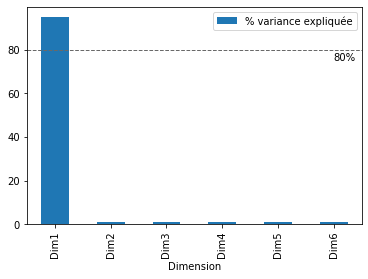

In [8]:
#diagramme en bare des composantes principales
tab.plot.bar(x = "Dimension", y = "% variance expliquée")
plt.text(5, 75, "80%") # ajout de texte, 5 et 80 = position du texte
plt.axhline(y = 80, linewidth = 1, color = "dimgray", linestyle = "--") # avoir une ligne à 80%
plt.show()


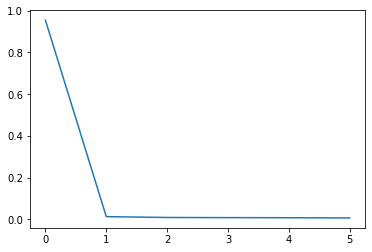

In [9]:
# Décroissance de la variance expliquée
plt.plot(pca.explained_variance_ratio_)
plt.show()

## 3) Clustering

### 3.a) K-means (n'a pas besoin que les variables soient centrées et réduites)

In [10]:
from sklearn.cluster import KMeans

In [11]:
#Cluster K-means
model=KMeans(3).fit(data)#définir le nb de cluster qu'on veut ici 3

print(model.labels_)#Le numéro correspon au cluster qu'on a attribué à chaque observation.

[2 2 2 ... 1 1 1]


#### Coordonnées des centres de chaque cluster

In [12]:
print(model.cluster_centers_)

[[ 5.07387711  5.0338748   4.97194638  4.97149574  5.01686686  5.01467504]
 [-4.94073725 -4.9636195  -4.96367228 -4.97950101 -4.9496098  -5.02540091]
 [ 0.03187948  0.04108557  0.02868673 -0.04115115  0.11600493 -0.04051435]]


#### Voir les clusters crées en 2D (2 variables a choisir)

In [13]:
centers = pd.DataFrame(model.cluster_centers_) # centers= dataframe contenant les coordonnées des centres de clusters
centers.columns = data.columns ; print(centers)#pour remettre le nom des colone et savoir quelle coodonnée correpond à quelle variable

       Var1      Var2      Var3      Var4      Var5      Var6
0  5.073877  5.033875  4.971946  4.971496  5.016867  5.014675
1 -4.940737 -4.963620 -4.963672 -4.979501 -4.949610 -5.025401
2  0.031879  0.041086  0.028687 -0.041151  0.116005 -0.040514


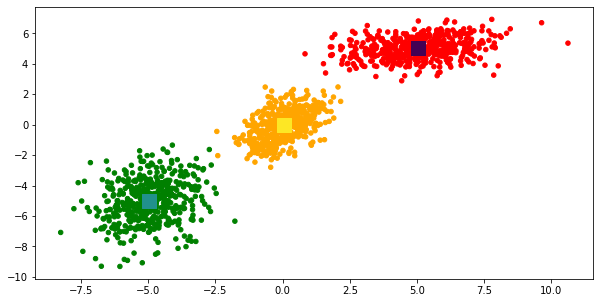

In [14]:
#Var2 et Var6
colormap=np.array(['Red','green','orange']) #Il faut autant de couleurs que de clusters définits plus tôt 
plt.figure(figsize=(10, 5))
plt.scatter(data.Var2, data.Var6,c=colormap[model.labels_],s=20) #s pour la taille des points
plt.scatter(centers.Var2, centers.Var6, c=range(3),s=200,marker="s")#afficher les centre de cluster

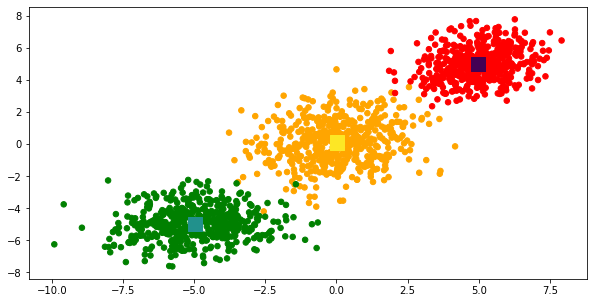

In [15]:
#Var3 et Var5
colormap=np.array(['Red','green','orange'])
plt.figure(figsize=(10, 5))
plt.scatter(data.Var3, data.Var5,c=colormap[model.labels_],s=30)#afficher les points
plt.scatter(centers.Var3,centers.Var5, c=range(3),s=200,marker="s")#afficher les centre de cluster 

### 3.b) CAH (Classification Ascendente Hiérarchique)

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#### Dendogramme

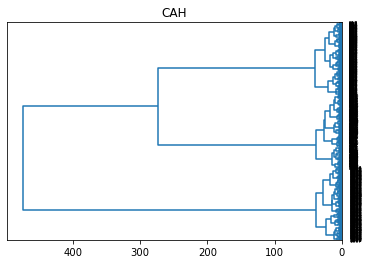

In [17]:
#générer la matrice des liens
Z = linkage(data, method='ward',metric='euclidean')
# on peut changer method='single', 'average', weighted', centroid'
# on peut aussi changer la distance qu'on utilise dans metric

#affichage du dendrogramme
plt.title("CAH")
dendrogram(Z,labels=data.index,orientation='left',color_threshold=0)
plt.show()

#### Découpage en fonction du nombre de classe qu'on veut

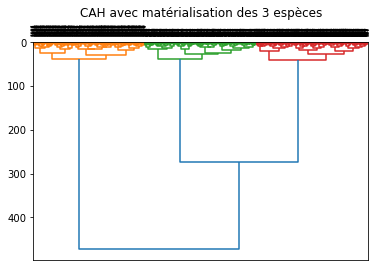

[2 2 2 ... 1 1 1]


In [27]:
#matérialisation des 3 espèces découpage à la hauteur t = 100 pour obtenir 3 groupes
plt.title('CAH avec matérialisation des 3 espèces')
dendrogram(Z,labels=data.index,orientation='left',color_threshold=100) #color_threshold=100 car découpage à t=100
plt.show()


groupes_cah = fcluster(Z,t=100,criterion='distance')#t=100 car découpage à 100
print(groupes_cah)

#### Représentation 2D pour 2 variables

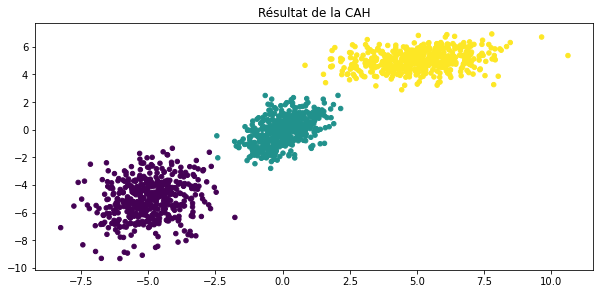

In [19]:
# Affichage des résultats de la CAH
plt.figure(figsize=(10, 10))
plt.subplot(212) ; plt.title("Résultat de la CAH")
plt.scatter(data.Var2,data.Var6, c=groupes_cah,s=20) ;
plt.show()

### 3.c) DBSCAN

In [20]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

#### Déterminer la valeur epsilon (=distance maximale pour être voisin d'une observation)


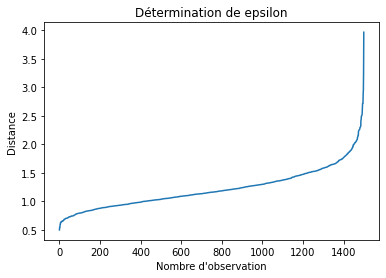

In [21]:
#On utilise la fonction NearestNeighbors qui calcule la distance des n_neighbors observations les plus proches de chaque observation. 
#On doit définir n_neighbors proche de 2*nb de variables

nbrs = NearestNeighbors(n_neighbors=13).fit(data) #n_neighbors=13 car calcule aussi distance du point à lui même (=0)
# Find the k-neighbors of a point
distances, indices = nbrs.kneighbors(data)
# sort the neighbor distances in ascending order
distances = np.sort(distances, axis=0)

distances = distances[:,2] #12 premières colones car on veut les 12 voisins les plus proches
plt.xlabel("Nombre d'observation")
plt.ylabel("Distance")
plt.title("Détermination de epsilon")
plt.plot(distances);

#D'après le graph, on va prendre epsilon environ=3 (ordonnée au niveau du coude)

#### Création des clusters

In [22]:
#eps = epsilon (définit case au dessus)
#min_sample : le nombre de voisin minimum qu'un point doit avoir pour créer un cluster

clusters = DBSCAN(eps =3, min_samples=12).fit(data)
clusters.labels_ #Pour chaque observation, donne le cluster. -1 veut dire que l'observation est une anomalie/valeur absurde


array([0, 0, 0, ..., 2, 2, 2])

In [23]:
#Connaitre le nombre d'observation par cluster :
from collections import Counter
Counter(clusters.labels_)

Counter({0: 500, 1: 499, -1: 1, 2: 500})

#### Représentation 2D pour 2 variables

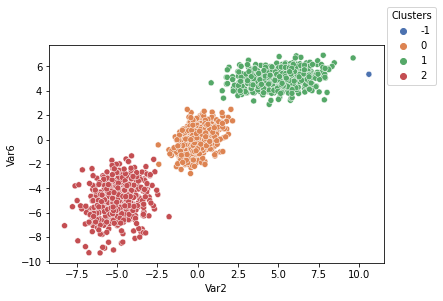

In [24]:
#Var2 et Var6
p = sb.scatterplot(data=data, x="Var2", y="Var6", hue=clusters.labels_, legend="full", palette="deep")
sb.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

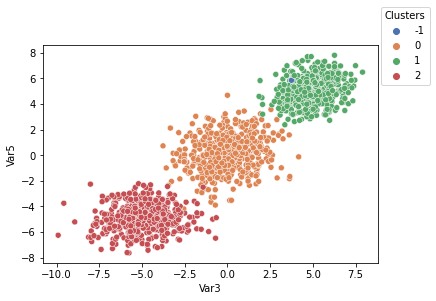

In [25]:
#Var 3 et Var5
p = sb.scatterplot(data=data, x="Var3", y="Var5", hue=clusters.labels_, legend="full", palette="deep")
sb.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()